<a href="https://colab.research.google.com/github/kdemertzis/Earthquakes/blob/main/regression_ROW_FORM_FULL-MASONRY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret
!pip install shap

     |████████████████████████████████| 263 kB 5.3 MB/s 
     |████████████████████████████████| 80 kB 5.7 MB/s 
     |████████████████████████████████| 1.7 MB 10.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 105 kB 35.7 MB/s 
     |████████████████████████████████| 6.8 MB 23.9 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 167 kB 47.0 MB/s 
     |████████████████████████████████| 14.4 MB 57 kB/s 
     |████████████████████████████████| 271 kB 43.3 MB/s 
     |████████████████████████████████| 1.3 MB 35.2 MB/s 
     |████████████████████████████████| 248 kB 50.6 MB/s 
     |████████████████████████████████| 2.0 MB 28.9 MB/s 
     |████████████████████████████████| 3.1 MB 32.9 MB/s 
     |████████████████████████████████| 62 kB 774 kB/s 
     |█████████████████████

In [18]:
"""
    Import library
"""
##-- PyCaret
import pycaret
from pycaret.regression import *
##-- Pandas
import pandas as pd
from pandas import Series, DataFrame
##-- Scikit-learn
import sklearn

In [ ]:
#data = pd.read_csv('/content/park_1st_shock.csv')

In [19]:
url = 'https://raw.githubusercontent.com/kdemertzis/Earthquakes/main/2.csv'
# load the dataset
df = pd.read_csv(url)

In [20]:
df.head()

,HI,PGA,Vmax/amax,ASI,TSIGN,TBRAC,PP,CAV,SED,TUD,EPA,PGV,PGD,Ia,Htot,ecc_tot,Vw1,Vw2,MIDR
0,34.69682,0.10302,0.12855,0.08556,18.66689,0.90507,0.24819,304.31962,440.05088,0.27157,0.08422,12.99187,9.37782,0.10914,9.6,0.0,0.0,0.0,0.1063
1,112.31037,0.27556,0.10762,0.21103,20.29793,23.67931,0.40150,1097.23440,1376.04044,6.44857,0.21040,29.09237,9.60392,1.15625,9.6,0.0,0.0,0.0,0.3909
2,54.36072,0.05061,0.25662,0.03496,44.63999,0.00000,1.09836,650.61521,786.00185,0.00000,0.03481,12.74285,11.32263,0.16481,9.6,0.0,0.0,0.0,0.0357
3,49.97794,0.04931,0.24211,0.04257,27.66725,0.00000,1.03692,436.01942,518.85313,0.00000,0.04197,11.71184,5.70295,0.11592,9.6,0.0,0.0,0.0,0.0309
4,145.98159,0.20528,0.17819,0.16116,14.28378,16.20496,0.96125,821.97453,3157.48763,5.02018,0.16156,35.88232,19.61064,0.89886,9.6,0.0,0.0,0.0,0.2240


In [ ]:
#reg = setup(data = data, target=data.columns[-1], session_id=99, html=False, silent=True, verbose=False)

In [21]:
reg = setup(data = df, target=df.columns[-1], session_id=99, html=False, silent=True)

Setup Succesfully Completed!


,Description,Value
0,session_id,99
1,Target,MIDR
2,Original Data,"(1950, 19)"
3,Missing Values,False
4,Numeric Features,18
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1364, 17)"


In [22]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.2052,0.324,0.423,0.7366,0.1477,1.4559,0.334


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.2052,0.3240,0.4230,0.7366,0.1477,1.4559,0.334
lasso,Lasso Regression,0.2711,0.3814,0.4941,0.6300,0.1923,2.2259,0.020


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.2049,0.3230,0.4228,0.7367,0.1473,1.4272,0.018
lr,Linear Regression,0.2052,0.3240,0.4230,0.7366,0.1477,1.4559,0.334
lasso,Lasso Regression,0.2711,0.3814,0.4941,0.6300,0.1923,2.2259,0.020


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.2049,0.3230,0.4228,0.7367,0.1473,1.4272,0.018
lr,Linear Regression,0.2052,0.3240,0.4230,0.7366,0.1477,1.4559,0.334
en,Elastic Net,0.2640,0.3752,0.4868,0.6423,0.1873,2.3327,0.018
lasso,Lasso Regression,0.2711,0.3814,0.4941,0.6300,0.1923,2.2259,0.020


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.2049,0.3230,0.4228,0.7367,0.1473,1.4272,0.018
lr,Linear Regression,0.2052,0.3240,0.4230,0.7366,0.1477,1.4559,0.334
lar,Least Angle Regression,0.2082,0.3249,0.4247,0.7342,0.1492,1.5213,0.020
en,Elastic Net,0.2640,0.3752,0.4868,0.6423,0.1873,2.3327,0.018
lasso,Lasso Regression,0.2711,0.3814,0.4941,0.6300,0.1923,2.2259,0.020


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.2049,0.3230,0.4228,0.7367,0.1473,1.4272,0.018
lr,Linear Regression,0.2052,0.3240,0.4230,0.7366,0.1477,1.4559,0.334
lar,Least Angle Regression,0.2082,0.3249,0.4247,0.7342,0.1492,1.5213,0.020
en,Elastic Net,0.2640,0.3752,0.4868,0.6423,0.1873,2.3327,0.018
lasso,Lasso Regression,0.2711,0.3814,0.4941,0.6300,0.1923,2.2259,0.020
llar,Lasso Least Angle Regression,0.5160,0.7102,0.7715,-0.0087,0.3595,8.7341,0.016


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.2049,0.3230,0.4228,0.7367,0.1473,1.4272,0.018
lr,Linear Regression,0.2052,0.3240,0.4230,0.7366,0.1477,1.4559,0.334
lar,Least Angle Regression,0.2082,0.3249,0.4247,0.7342,0.1492,1.5213,0.020
en,Elastic Net,0.2640,0.3752,0.4868,0.6423,0.1873,2.3327,0.018
omp,Orthogonal Matching Pursuit,0.2504,0.3786,0.4880,0.6378,0.1802,1.4332,0.015
lasso,Lasso Regression,0.2711,0.3814,0.4941,0.6300,0.1923,2.2259,0.020
llar,Lasso Least Angle Regression,0.5160,0.7102,0.7715,-0.0087,0.3595,8.7341,0.016


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.2045,0.3217,0.4217,0.7385,0.1465,1.5333,0.017
ridge,Ridge Regression,0.2049,0.3230,0.4228,0.7367,0.1473,1.4272,0.018
lr,Linear Regression,0.2052,0.3240,0.4230,0.7366,0.1477,1.4559,0.334
lar,Least Angle Regression,0.2082,0.3249,0.4247,0.7342,0.1492,1.5213,0.020
en,Elastic Net,0.2640,0.3752,0.4868,0.6423,0.1873,2.3327,0.018
omp,Orthogonal Matching Pursuit,0.2504,0.3786,0.4880,0.6378,0.1802,1.4332,0.015
lasso,Lasso Regression,0.2711,0.3814,0.4941,0.6300,0.1923,2.2259,0.020
llar,Lasso Least Angle Regression,0.5160,0.7102,0.7715,-0.0087,0.3595,8.7341,0.016


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.2045,0.3217,0.4217,0.7385,0.1465,1.5333,0.017
ridge,Ridge Regression,0.2049,0.3230,0.4228,0.7367,0.1473,1.4272,0.018
lr,Linear Regression,0.2052,0.3240,0.4230,0.7366,0.1477,1.4559,0.334
lar,Least Angle Regression,0.2082,0.3249,0.4247,0.7342,0.1492,1.5213,0.020
en,Elastic Net,0.2640,0.3752,0.4868,0.6423,0.1873,2.3327,0.018
omp,Orthogonal Matching Pursuit,0.2504,0.3786,0.4880,0.6378,0.1802,1.4332,0.015
lasso,Lasso Regression,0.2711,0.3814,0.4941,0.6300,0.1923,2.2259,0.020
par,Passive Aggressive Regressor,0.3639,0.5262,0.6246,0.3399,0.2510,1.3302,0.018
llar,Lasso Least Angle Regression,0.5160,0.7102,0.7715,-0.0087,0.3595,8.7341,0.016


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.2045,0.3217,0.4217,0.7385,0.1465,1.5333,0.017
ridge,Ridge Regression,0.2049,0.3230,0.4228,0.7367,0.1473,1.4272,0.018
lr,Linear Regression,0.2052,0.3240,0.4230,0.7366,0.1477,1.4559,0.334
lar,Least Angle Regression,0.2082,0.3249,0.4247,0.7342,0.1492,1.5213,0.020
en,Elastic Net,0.2640,0.3752,0.4868,0.6423,0.1873,2.3327,0.018
omp,Orthogonal Matching Pursuit,0.2504,0.3786,0.4880,0.6378,0.1802,1.4332,0.015
lasso,Lasso Regression,0.2711,0.3814,0.4941,0.6300,0.1923,2.2259,0.020
huber,Huber Regressor,0.2856,0.4016,0.5117,0.5998,0.1988,2.4230,0.060
par,Passive Aggressive Regressor,0.3639,0.5262,0.6246,0.3399,0.2510,1.3302,0.018
llar,Lasso Least Angle Regression,0.5160,0.7102,0.7715,-0.0087,0.3595,8.7341,0.016


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.2045,0.3217,0.4217,0.7385,0.1465,1.5333,0.017
ridge,Ridge Regression,0.2049,0.3230,0.4228,0.7367,0.1473,1.4272,0.018
lr,Linear Regression,0.2052,0.3240,0.4230,0.7366,0.1477,1.4559,0.334
lar,Least Angle Regression,0.2082,0.3249,0.4247,0.7342,0.1492,1.5213,0.020
knn,K Neighbors Regressor,0.1549,0.3447,0.4532,0.6760,0.1303,0.2621,0.064
en,Elastic Net,0.2640,0.3752,0.4868,0.6423,0.1873,2.3327,0.018
omp,Orthogonal Matching Pursuit,0.2504,0.3786,0.4880,0.6378,0.1802,1.4332,0.015
lasso,Lasso Regression,0.2711,0.3814,0.4941,0.6300,0.1923,2.2259,0.020
huber,Huber Regressor,0.2856,0.4016,0.5117,0.5998,0.1988,2.4230,0.060
par,Passive Aggressive Regressor,0.3639,0.5262,0.6246,0.3399,0.2510,1.3302,0.018


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.2045,0.3217,0.4217,0.7385,0.1465,1.5333,0.017
ridge,Ridge Regression,0.2049,0.3230,0.4228,0.7367,0.1473,1.4272,0.018
lr,Linear Regression,0.2052,0.3240,0.4230,0.7366,0.1477,1.4559,0.334
lar,Least Angle Regression,0.2082,0.3249,0.4247,0.7342,0.1492,1.5213,0.020
knn,K Neighbors Regressor,0.1549,0.3447,0.4532,0.6760,0.1303,0.2621,0.064
en,Elastic Net,0.2640,0.3752,0.4868,0.6423,0.1873,2.3327,0.018
omp,Orthogonal Matching Pursuit,0.2504,0.3786,0.4880,0.6378,0.1802,1.4332,0.015
lasso,Lasso Regression,0.2711,0.3814,0.4941,0.6300,0.1923,2.2259,0.020
huber,Huber Regressor,0.2856,0.4016,0.5117,0.5998,0.1988,2.4230,0.060
par,Passive Aggressive Regressor,0.3639,0.5262,0.6246,0.3399,0.2510,1.3302,0.018


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.2045,0.3217,0.4217,0.7385,0.1465,1.5333,0.017
ridge,Ridge Regression,0.2049,0.3230,0.4228,0.7367,0.1473,1.4272,0.018
lr,Linear Regression,0.2052,0.3240,0.4230,0.7366,0.1477,1.4559,0.334
lar,Least Angle Regression,0.2082,0.3249,0.4247,0.7342,0.1492,1.5213,0.020
knn,K Neighbors Regressor,0.1549,0.3447,0.4532,0.6760,0.1303,0.2621,0.064
en,Elastic Net,0.2640,0.3752,0.4868,0.6423,0.1873,2.3327,0.018
omp,Orthogonal Matching Pursuit,0.2504,0.3786,0.4880,0.6378,0.1802,1.4332,0.015
lasso,Lasso Regression,0.2711,0.3814,0.4941,0.6300,0.1923,2.2259,0.020
huber,Huber Regressor,0.2856,0.4016,0.5117,0.5998,0.1988,2.4230,0.060
rf,Random Forest Regressor,0.1538,0.4435,0.5410,0.3898,0.1285,0.2347,0.815


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.2045,0.3217,0.4217,0.7385,0.1465,1.5333,0.017
ridge,Ridge Regression,0.2049,0.3230,0.4228,0.7367,0.1473,1.4272,0.018
lr,Linear Regression,0.2052,0.3240,0.4230,0.7366,0.1477,1.4559,0.334
lar,Least Angle Regression,0.2082,0.3249,0.4247,0.7342,0.1492,1.5213,0.020
knn,K Neighbors Regressor,0.1549,0.3447,0.4532,0.6760,0.1303,0.2621,0.064
en,Elastic Net,0.2640,0.3752,0.4868,0.6423,0.1873,2.3327,0.018
omp,Orthogonal Matching Pursuit,0.2504,0.3786,0.4880,0.6378,0.1802,1.4332,0.015
lasso,Lasso Regression,0.2711,0.3814,0.4941,0.6300,0.1923,2.2259,0.020
huber,Huber Regressor,0.2856,0.4016,0.5117,0.5998,0.1988,2.4230,0.060
rf,Random Forest Regressor,0.1538,0.4435,0.5410,0.3898,0.1285,0.2347,0.815


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.2045,0.3217,0.4217,0.7385,0.1465,1.5333,0.017
ridge,Ridge Regression,0.2049,0.3230,0.4228,0.7367,0.1473,1.4272,0.018
lr,Linear Regression,0.2052,0.3240,0.4230,0.7366,0.1477,1.4559,0.334
lar,Least Angle Regression,0.2082,0.3249,0.4247,0.7342,0.1492,1.5213,0.020
knn,K Neighbors Regressor,0.1549,0.3447,0.4532,0.6760,0.1303,0.2621,0.064
en,Elastic Net,0.2640,0.3752,0.4868,0.6423,0.1873,2.3327,0.018
omp,Orthogonal Matching Pursuit,0.2504,0.3786,0.4880,0.6378,0.1802,1.4332,0.015
lasso,Lasso Regression,0.2711,0.3814,0.4941,0.6300,0.1923,2.2259,0.020
huber,Huber Regressor,0.2856,0.4016,0.5117,0.5998,0.1988,2.4230,0.060
rf,Random Forest Regressor,0.1538,0.4435,0.5410,0.3898,0.1285,0.2347,0.815


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.2045,0.3217,0.4217,0.7385,0.1465,1.5333,0.017
ridge,Ridge Regression,0.2049,0.3230,0.4228,0.7367,0.1473,1.4272,0.018
lr,Linear Regression,0.2052,0.3240,0.4230,0.7366,0.1477,1.4559,0.334
lar,Least Angle Regression,0.2082,0.3249,0.4247,0.7342,0.1492,1.5213,0.020
knn,K Neighbors Regressor,0.1549,0.3447,0.4532,0.6760,0.1303,0.2621,0.064
en,Elastic Net,0.2640,0.3752,0.4868,0.6423,0.1873,2.3327,0.018
omp,Orthogonal Matching Pursuit,0.2504,0.3786,0.4880,0.6378,0.1802,1.4332,0.015
lasso,Lasso Regression,0.2711,0.3814,0.4941,0.6300,0.1923,2.2259,0.020
huber,Huber Regressor,0.2856,0.4016,0.5117,0.5998,0.1988,2.4230,0.060
gbr,Gradient Boosting Regressor,0.1759,0.4125,0.5323,0.4942,0.1363,0.5681,0.208


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.1394,0.3049,0.4073,0.7537,0.1137,0.4206,0.134
br,Bayesian Ridge,0.2045,0.3217,0.4217,0.7385,0.1465,1.5333,0.017
ridge,Ridge Regression,0.2049,0.3230,0.4228,0.7367,0.1473,1.4272,0.018
lr,Linear Regression,0.2052,0.3240,0.4230,0.7366,0.1477,1.4559,0.334
lar,Least Angle Regression,0.2082,0.3249,0.4247,0.7342,0.1492,1.5213,0.020
knn,K Neighbors Regressor,0.1549,0.3447,0.4532,0.6760,0.1303,0.2621,0.064
en,Elastic Net,0.2640,0.3752,0.4868,0.6423,0.1873,2.3327,0.018
omp,Orthogonal Matching Pursuit,0.2504,0.3786,0.4880,0.6378,0.1802,1.4332,0.015
lasso,Lasso Regression,0.2711,0.3814,0.4941,0.6300,0.1923,2.2259,0.020
huber,Huber Regressor,0.2856,0.4016,0.5117,0.5998,0.1988,2.4230,0.060


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.1394,0.3049,0.4073,0.7537,0.1137,0.4206,0.134
br,Bayesian Ridge,0.2045,0.3217,0.4217,0.7385,0.1465,1.5333,0.017
ridge,Ridge Regression,0.2049,0.3230,0.4228,0.7367,0.1473,1.4272,0.018
lr,Linear Regression,0.2052,0.3240,0.4230,0.7366,0.1477,1.4559,0.334
lar,Least Angle Regression,0.2082,0.3249,0.4247,0.7342,0.1492,1.5213,0.020
knn,K Neighbors Regressor,0.1549,0.3447,0.4532,0.6760,0.1303,0.2621,0.064
en,Elastic Net,0.2640,0.3752,0.4868,0.6423,0.1873,2.3327,0.018
omp,Orthogonal Matching Pursuit,0.2504,0.3786,0.4880,0.6378,0.1802,1.4332,0.015
lasso,Lasso Regression,0.2711,0.3814,0.4941,0.6300,0.1923,2.2259,0.020
huber,Huber Regressor,0.2856,0.4016,0.5117,0.5998,0.1988,2.4230,0.060


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=99, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [23]:
best = create_model("lightgbm", fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1259,0.1372,0.3705,0.7292,0.1427,0.2682
1,0.1362,0.0730,0.2703,0.7707,0.1043,0.4953
2,0.1239,0.0831,0.2882,0.8099,0.0968,0.2373
3,0.1409,0.0905,0.3007,0.8232,0.1100,0.3680
4,0.1218,0.0743,0.2725,0.7884,0.1113,0.3167
5,0.1220,0.0709,0.2663,0.8319,0.0938,0.2763
6,0.1083,0.0372,0.1928,0.9235,0.0764,0.3549
7,0.2554,2.3071,1.5189,0.2679,0.1934,0.3294
8,0.1244,0.0876,0.2960,0.7811,0.1044,1.0881
9,0.1349,0.0883,0.2971,0.8117,0.1040,0.4718


In [24]:
tuned_model = tune_model(best)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.4s finished


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1399,0.1273,0.3568,0.7489,0.1456,1.5599
1,0.1421,0.0529,0.2300,0.8340,0.1023,1.1181
2,0.1422,0.0811,0.2848,0.8144,0.1081,0.8680
3,0.1421,0.0520,0.2280,0.8983,0.0980,0.7527
4,0.1251,0.0530,0.2301,0.8491,0.1008,0.6142
5,0.1314,0.0545,0.2334,0.8709,0.0956,0.4413
6,0.1442,0.0568,0.2384,0.8831,0.0996,1.1285
7,0.2787,2.3611,1.5366,0.2507,0.2029,0.9479
8,0.1246,0.0499,0.2234,0.8754,0.0955,1.5016
9,0.1647,0.0900,0.3000,0.8080,0.1117,0.8620


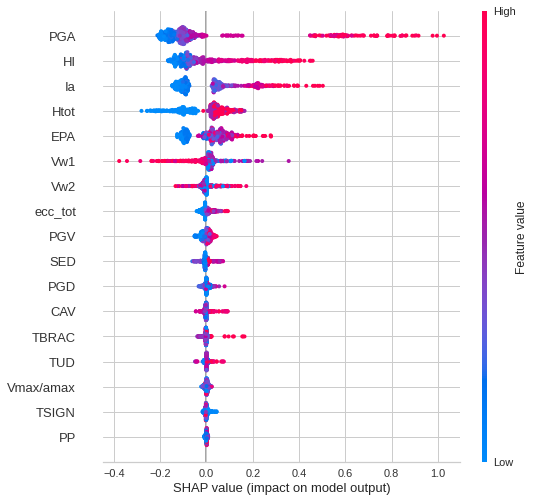

In [25]:
interpret_model(tuned_model)

In [26]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…